* band pass filter for theta, alpha, beta, and gamma -> single epoch
* compute lcmv
* epochs in source space
* envelope on single epoch (envelope = abs(hilbert))
* average envelopes

In [50]:
import mne
import os
import re

os.environ['MNE_3D_OPTION_ANTIALIAS']='false' # to make visualization work

current_dir = os.path.dirname(os.path.abspath('./'))
if not current_dir in sys.path:
    sys.path.append(current_dir)

from utils import check_paths

import imageio.v3 as iio


In [ ]:
# create mri dirs in all subs
#! DON'T LAUNCH ANY MORE

subs_path = 'D:\\Ekaterina_Voevodina\\memory_formation\\data\\subjects'
subs_dir = os.listdir(subs_path)

for sub_dir in subs_dir:
    if 'sub' in sub_dir:
        path = os.path.join(subs_path, sub_dir, 'mri')
        os.mkdir(path)


In [51]:
# directories to work with
subjects_dir = 'D:\\Ekaterina_Voevodina\\memory_formation\\data\\subjects'
mris_dir = 'D:\\Ekaterina_Voevodina\\memory_formation\\data\\mri'
fsaverage_src_path = os.path.join(mris_dir, 'fsaverage', 'bem', 'fsaverage-ico-5-src.fif')

In [ ]:
# fetch and update fsaverage
#! DON'T LAUNCH ANY MORE
fs_ave = mne.datasets.fetch_fsaverage(subjects_dir=mris_dir)

In [32]:
# directories to work with
#! LAUNCH ONLY FOR GROUP ANALYSIS
subjects_dir = 'D:\\Ekaterina_Voevodina\\memory_formation\\data\\subjects'
mris_dir = 'D:\\Ekaterina_Voevodina\\memory_formation\\data\\mri'

for subject in os.listdir(subjects_dir):
    subject_path = os.path.join(subjects_dir, subject)
    # mri_path = os.path.join(mris_dir, subject)
    trans_path = os.path.join(mris_dir, subject, f'{subject}_trans')
    epochs_dir = os.path.join(subject_path, 'epochs')
    epochs_path = os.path.join(epochs_dir, os.listdir(epochs_dir)[0])
    # epochs = mne.read_epochs(epochs_path)
    # trans = mne.read_trans(trans_path)


In [52]:
# dirs to test SR on single subject
subject = 'sub2'
subject_dir = os.path.join(subjects_dir, subject)
# mri_path = os.path.join(mris_dir, subject)
epochs_dir = os.path.join(subject_dir, 'epochs')
epochs_path = os.path.join(epochs_dir, os.listdir(epochs_dir)[0])
trans_path = os.path.join(mris_dir, subject, f'{subject}_trans')

# print(subject_dir, mris_dir, epochs_dir, epochs_path, trans_path, sep='\n')


In [99]:
epochs = mne.read_epochs(epochs_path).pick_types(meg='grad')
info = epochs.info

Reading D:\Ekaterina_Voevodina\memory_formation\data\subjects\sub2\epochs\enc_epochs.fif ...
    Found the data of interest:
        t =   -1500.00 ...    3995.00 ms
        0 CTF compensation matrices available


C:\Users\CCDM\AppData\Local\Temp\ipykernel_8452\683721193.py:1: RuntimeWarning: This filename (D:\Ekaterina_Voevodina\memory_formation\data\subjects\sub2\epochs\enc_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epochs_path).pick_types(meg='mag')


Not setting metadata
210 matching events found
No baseline correction applied
0 projection items activated


In [53]:
# read epochs and trans files
epochs = mne.read_epochs(epochs_path)
info = epochs.info
trans = mne.read_trans(trans_path)

Reading D:\Ekaterina_Voevodina\memory_formation\data\subjects\sub2\epochs\enc_epochs.fif ...
    Found the data of interest:
        t =   -1500.00 ...    3995.00 ms
        0 CTF compensation matrices available


C:\Users\CCDM\AppData\Local\Temp\ipykernel_8452\52449833.py:2: RuntimeWarning: This filename (D:\Ekaterina_Voevodina\memory_formation\data\subjects\sub2\epochs\enc_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epochs_path)


Not setting metadata
210 matching events found
No baseline correction applied
0 projection items activated


In [ ]:
# set frequency bands

evoked_theta = epochs.pick_types(meg='grad').filter(4., 8.).average()
# evoked_alpha = epochs.pick_types(meg='grad').filter(8., 15.).average()
# evoked_beta = epochs.pick_types(meg='grad').filter(15., 30.).average()
# evoked_gamma = epochs.pick_types(meg='grad').filter(30., 60.).average()

In [5]:
epochs_theta = epochs.pick_types(meg='grad').filter(4., 8.)

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 331 samples (1.655 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 21420 out of 21420 | elapsed:    3.9s finished


In [ ]:
epochs_theta

In [28]:
hilbert2 == average1

True

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 331 samples (1.655 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:    0.0s finished


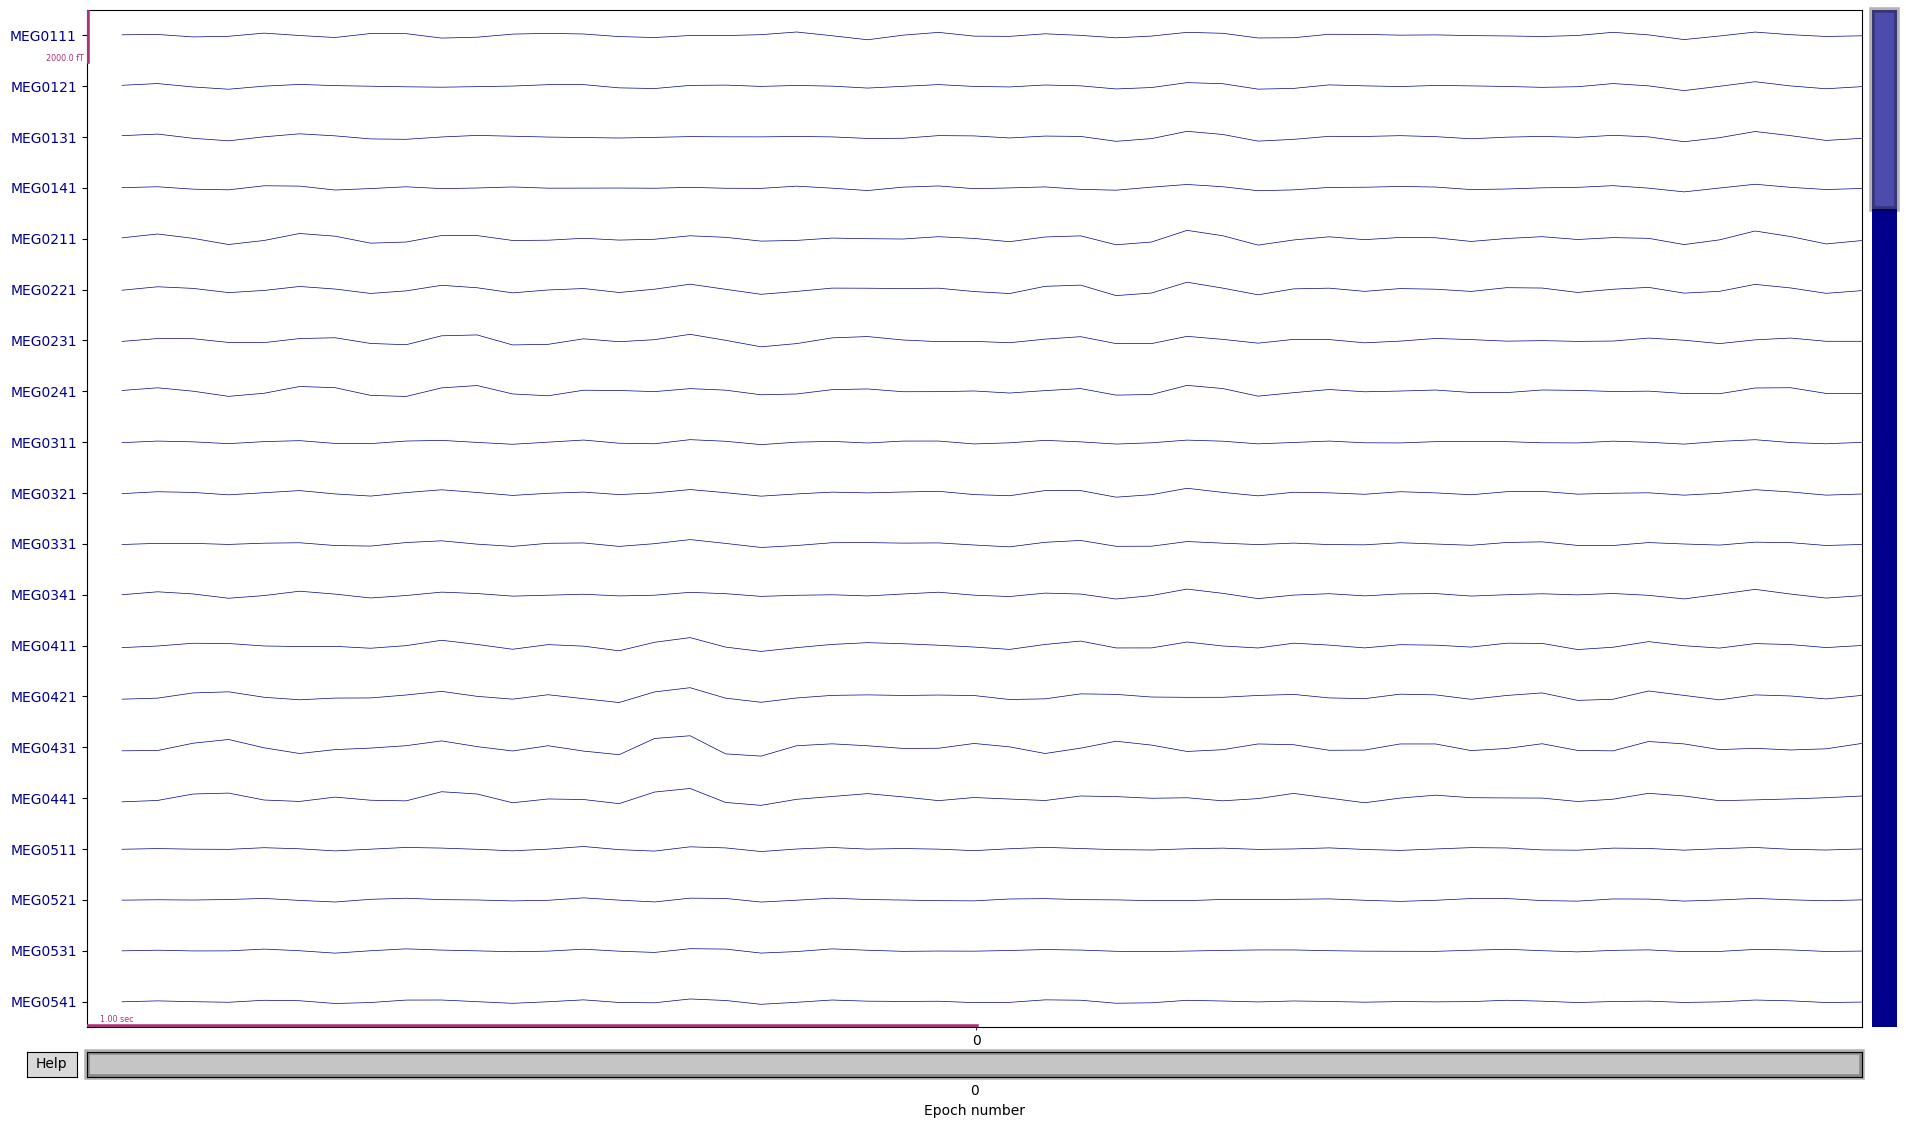

No projector specified for this dataset. Please consider the method self.add_proj.


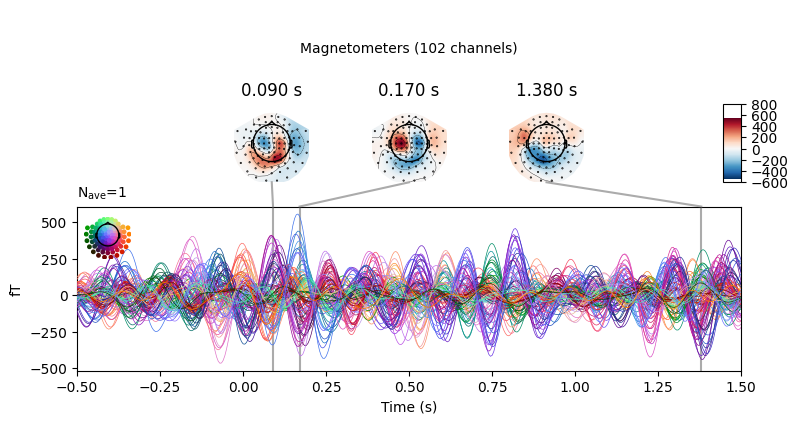

No projector specified for this dataset. Please consider the method self.add_proj.


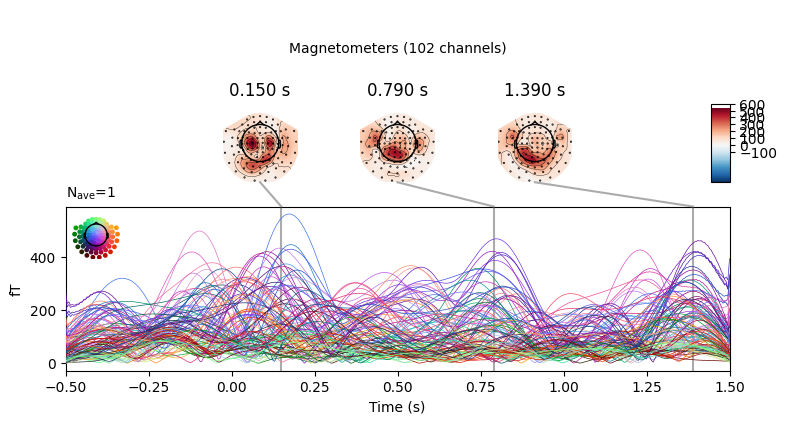

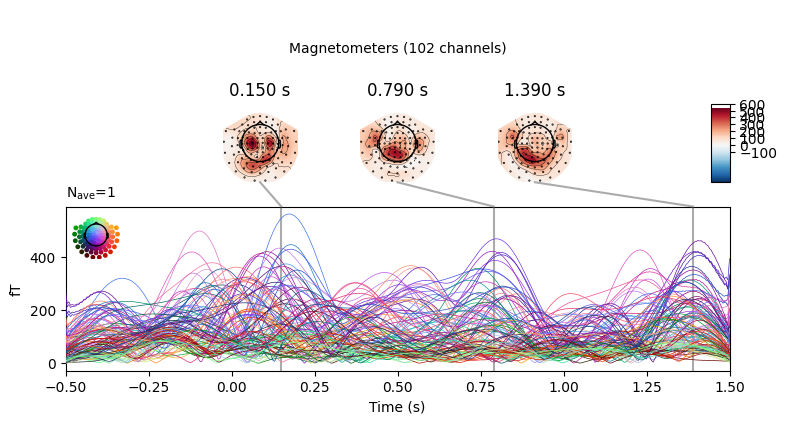

In [26]:
cropped_epoch_theta = epochs[0].crop(-0.5, 1.5).pick_types(meg='grad').filter(4., 8.)
cropped_epoch_theta.plot()
average2 = cropped_epoch_theta.average()
average2.plot_joint()
hilbert2 = average2.apply_hilbert(envelope=True)
hilbert2.plot_joint()


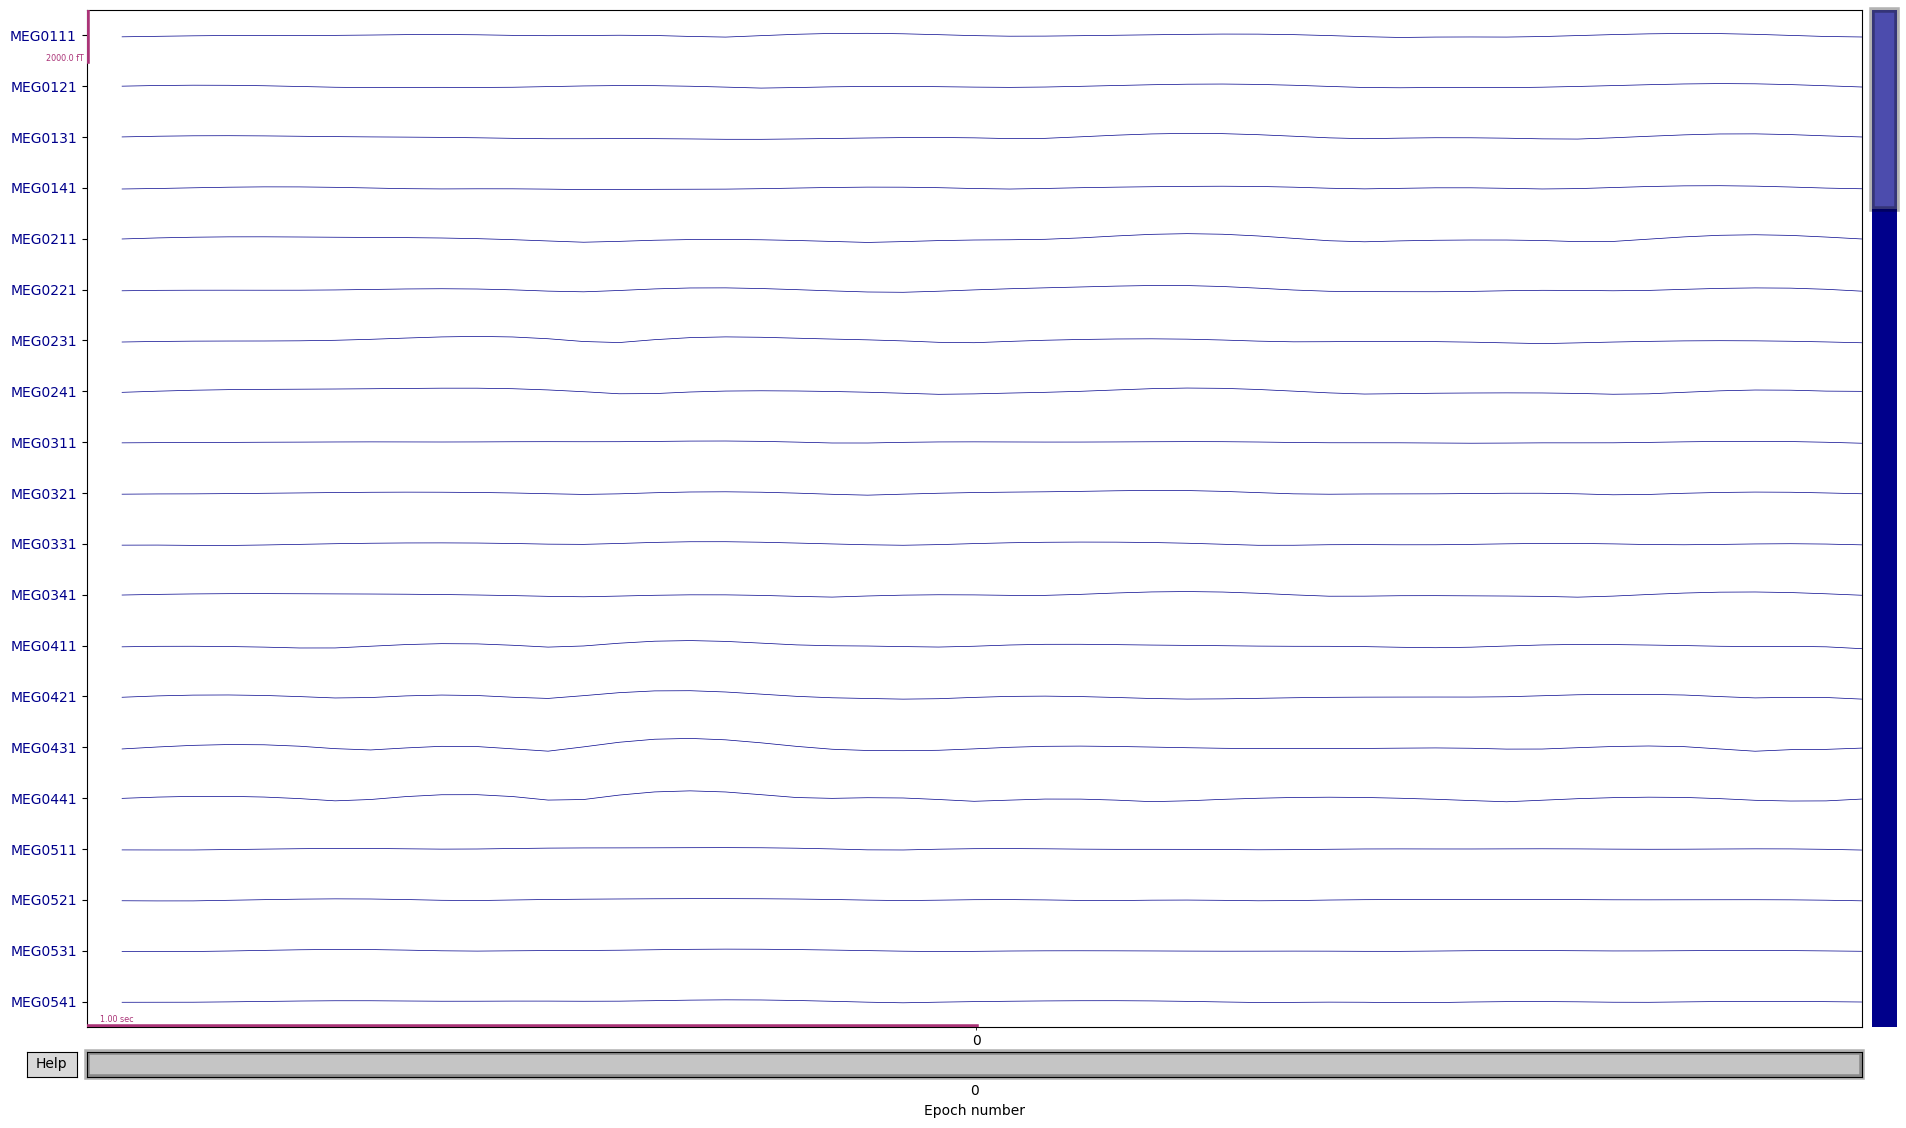

No projector specified for this dataset. Please consider the method self.add_proj.


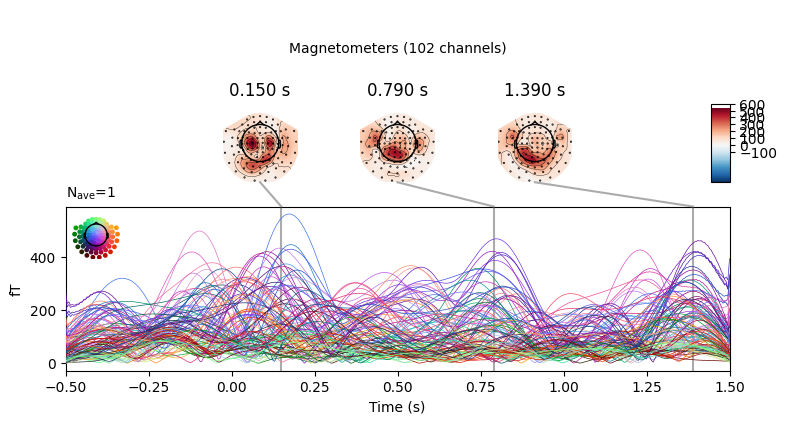

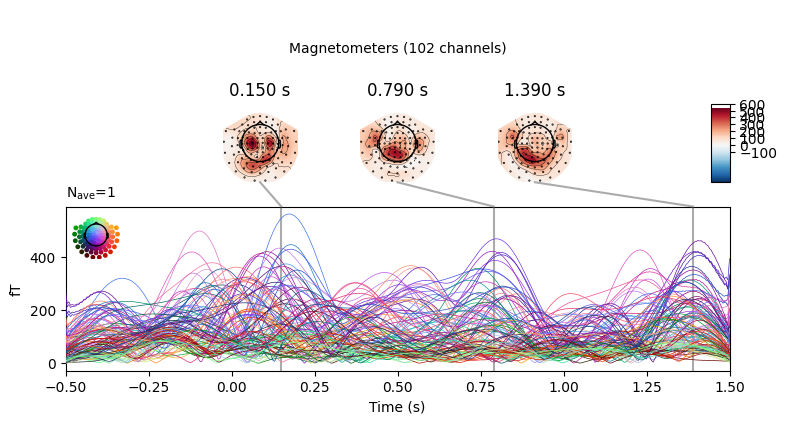

In [27]:
hilbert1 = cropped_epoch_theta.apply_hilbert(envelope=True)
hilbert1.plot()
average1 = hilbert1.average()
average1.plot_joint()


Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 331 samples (1.655 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 21420 out of 21420 | elapsed:    3.8s finished


No projector specified for this dataset. Please consider the method self.add_proj.


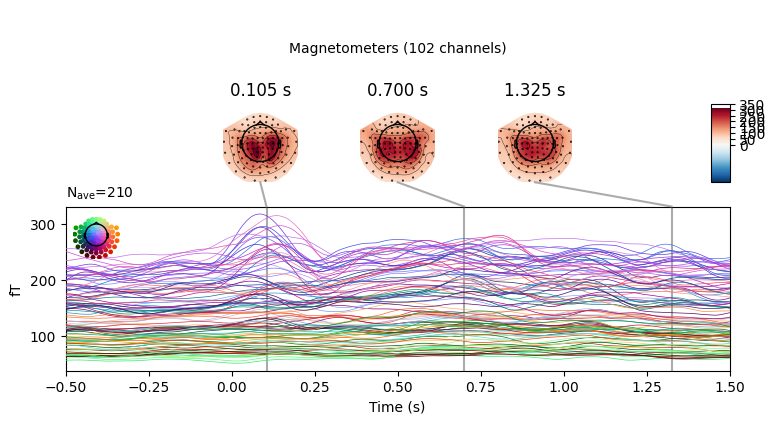

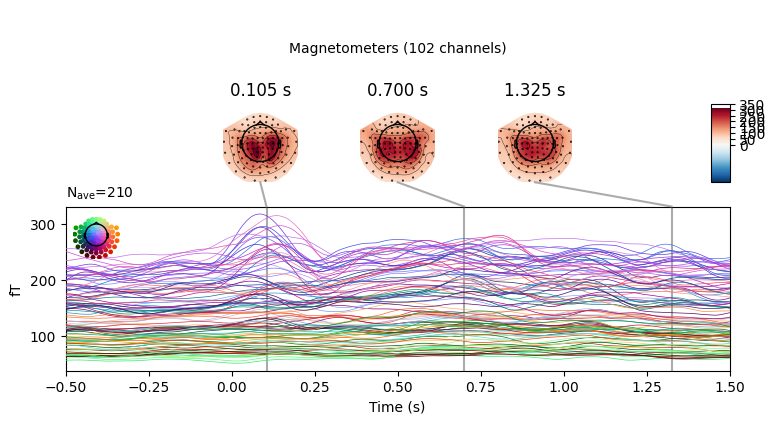

In [14]:
epochs.copy().pick_types(meg='grad').filter(4.,8.).apply_hilbert(envelope=True).average().v.plot_joint()

No projector specified for this dataset. Please consider the method self.add_proj.


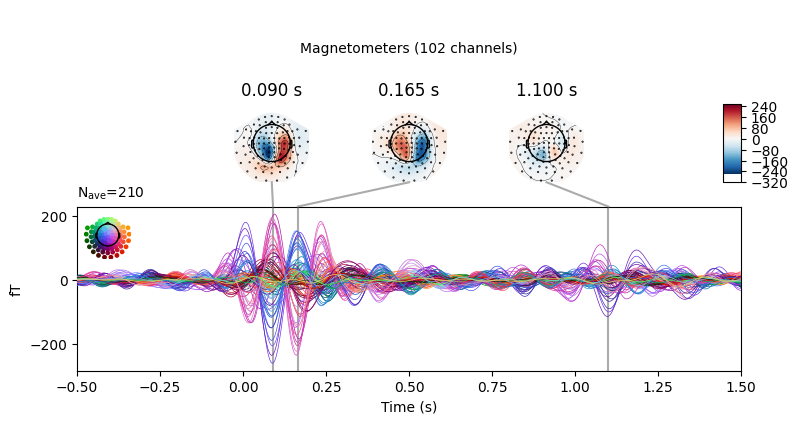

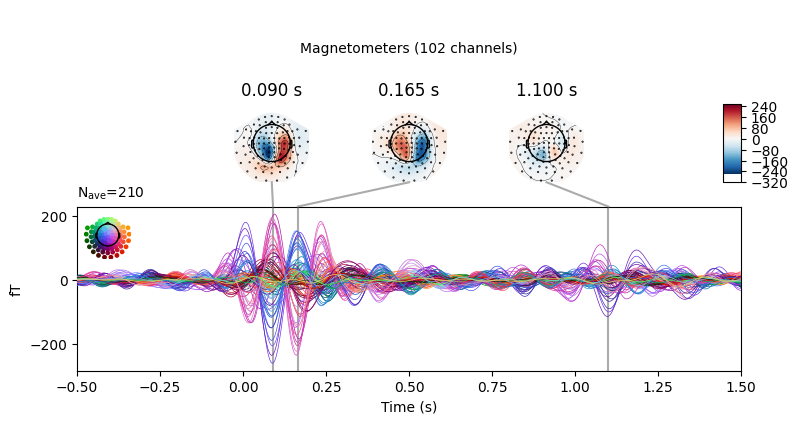

In [15]:
evoked_theta.copy().crop(-0.5, 1.5).plot_joint()

No projector specified for this dataset. Please consider the method self.add_proj.


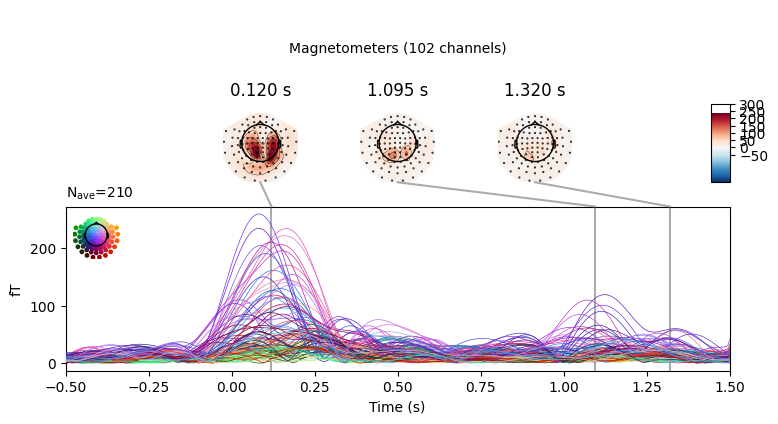

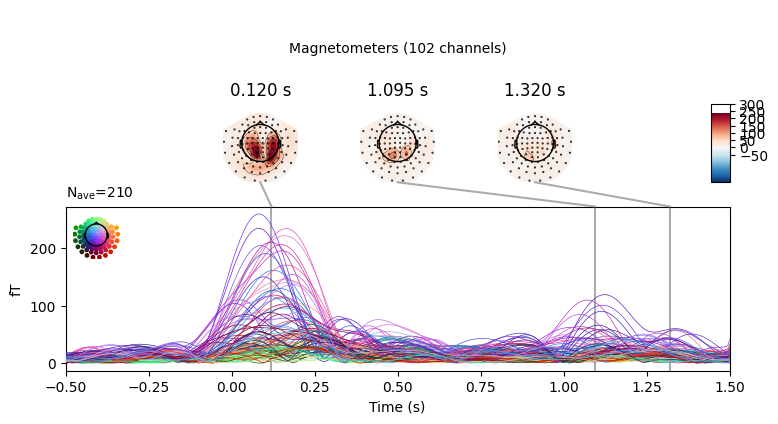

In [8]:
evoked_theta.copy().crop(-0.5, 1.5).apply_hilbert(envelope=True).plot_joint()

In [ ]:
# visualize evoked
#! DON'T ADD TO THE FINAL SCRIPT

evoked_theta.copy().crop(-0.5, 1.5).plot_joint()
evoked_alpha.copy().crop(-0.5, 1.5).plot_joint()
evoked_beta.copy().crop(-0.5, 1.5).plot_joint()
evoked_gamma.copy().crop(-0.5, 1.5).plot_joint()

In [6]:
# create source space
src = mne.setup_source_space(
    subject, spacing='oct6', add_dist='patch',
    subjects_dir=mris_dir)
print(src)

Setting up the source space with the following parameters:

SUBJECTS_DIR = D:\Ekaterina_Voevodina\memory_formation\data\mri
Subject      = sub2
Surface      = white
Octahedron subdivision grade 6

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading D:\Ekaterina_Voevodina\memory_formation\data\mri\sub2\surf\lh.white...
Mapping lh sub2 -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from D:\Ekaterina_Voevodina\memory_formation\data\mri\sub2\surf\lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/158411 selected to source space (oct = 6)

Loading D:\Ekaterina_Voevodina\memory_formation\data\mri\sub2\surf\rh.white...
Mapping rh sub2 -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from D:\Ekaterina_Voevodina\memory_formation\data\mri\sub2\surf\rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 4098/151372 selected to source sp

In [ ]:
# visualize BEM surfaces
#! DON'T ADD TO THE FINAL SCRIPT

plot_bem_kwargs = dict(
    subject=subject, subjects_dir=mris_dir,
    brain_surfaces='white', orientation='coronal')

mne.viz.plot_bem(src=src, **plot_bem_kwargs)


In [11]:
# visualization of sources in 3d
#! DON'T ADD TO THE FINAL SCRIPT

fig = mne.viz.plot_alignment(subject=subject, subjects_dir=mris_dir,
                             surfaces='white', coord_frame='mri',
                             src=src)
mne.viz.set_3d_view(fig, azimuth=173.78, elevation=101.75,
                    distance=0.30, focalpoint=(-0.03, -0.01, 0.03))


In [7]:
# create BEM model

model = mne.make_bem_model(subject=subject, ico=4, #? ico downsampling
                           conductivity=[0.3], # for single layer - suitable for MEG data
                           subjects_dir=mris_dir)
bem = mne.make_bem_solution(model)

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
inner skull CM is  -0.87 -19.58  35.45 mm
Surfaces passed the basic topology checks.
Complete.

Approximation method : Linear collocation

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
    Inverting the coefficient matrix...
Solution ready.
BEM geometry computations complete.


In [8]:
# compute the leadfield matrix / forward operator

fwd = mne.make_forward_solution(info, trans=trans, src=src, bem=bem,
                                meg=True, eeg=False, mindist=5.0, n_jobs=None,
                                verbose=True)
print(fwd)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=158411, n_used=4098>, <surface (rh), n_vertices=151372, n_used=4098>] MRI (surface RAS) coords, subject 'sub2', ~28.4 MB>
MRI -> head transform : instance of Transform
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999479 -0.032275 -0.000017       1.68 mm
     0.031390  0.971958  0.233051      19.46 mm
    -0.007505 -0.232930  0.972465      18.91 mm
     0.000000  0.000000  0.000000       1.00

Read 102 MEG channels from info
105 coil definitions read
Coordinate transformation: MEG device -> head
     1.000000  0.000000  0.000000       0.00 mm
     0.000000  1.000000  0.000000       0.00 mm
     0.000000  0.000000  1.000000      45.00 mm
     0.000000  0.000000  0.000000  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found    0/2883 points outside using solid angles
    Total 4098/4098 points inside the surface
Interior check completed in 2037.9 ms
    4 source space point omitted because of the    5.0-mm distance limit.
    Computing patch statistics...
    Patch information added...
Checking surface interior status for 4098 points...
    Found 1286/4098 points inside  an interior sphere of radius   46.8 mm
    Found    0/4098 points outside an exterior sphere of radius   92.5 mm
    Found    0/2812 points outside using surface Qhull


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found    0/2812 points outside using solid angles
    Total 4098/4098 points inside the surface
Interior check completed in 1958.8 ms

Checking surface interior status for 102 points...
    Found   0/102 points inside  an interior sphere of radius   46.8 mm
    Found 102/102 points outside an exterior sphere of radius   92.5 mm
    Found   0/  0 points outside using surface Qhull


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


    Found   0/  0 points outside using solid angles
    Total 0/102 points inside the surface
Interior check completed in 221.2 ms
Setting up compensation data...
    No compensation set. Nothing more to do.

Composing the field computation matrix...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Computing MEG at 8192 source locations (free orientations)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished



Finished.
<Forward | MEG channels: 102 | EEG channels: 0 | Source space: Surface with 8192 vertices | Source orientation: Free>


In [9]:
# check number of vertices
#! DON'T ADD TO THE FINAL SCRIPT

print(f'Before: {src}')
print(f'After:  {fwd["src"]}')

# numpy array containing gain matrix
leadfield = fwd['sol']['data']
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

Before: <SourceSpaces: [<surface (lh), n_vertices=158411, n_used=4098>, <surface (rh), n_vertices=151372, n_used=4098>] MRI (surface RAS) coords, subject 'sub2', ~28.4 MB>
After:  <SourceSpaces: [<surface (lh), n_vertices=158411, n_used=4094>, <surface (rh), n_vertices=151372, n_used=4098>] head coords, subject 'sub2', ~28.4 MB>
Leadfield size : 102 sensors x 24576 dipoles


In [ ]:
# numpy array containing the forward operator corresponding to the source space
#! DON'T ADD TO THE FINAL SCRIPT

fwd_fixed = mne.convert_forward_solution(fwd, surf_ori=True, force_fixed=True,
                                         use_cps=True)
leadfield = fwd_fixed['sol']['data']
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

In [ ]:
# save forward solution
#? How to set the path?

fwd_save = mne.write_forward_solution('forward_solution.fif', fwd_fixed, overwrite=False) #?

# mne.read_forward_solution(fname, include=(), exclude=(), verbose=None) to read the fwd solution file

In [ ]:
#! DON'T ADD TO THE FINAL SCRIPT

mne.viz.plot_alignment(info, trans, subject=subject, dig=True,
                       meg=['helmet', 'sensors'], subjects_dir=mris_dir,
                       surfaces='head-dense')

Computing rank from data with rank=None
    Using tolerance 8.4e-09 (2.2e-16 eps * 102 dim * 3.7e+05  max singular value)
    Estimated rank (mag): 102
Found multiple SSS records. Using the first.
    MAG: rank 102 computed from 102 data channels with 0 projectors


C:\Users\CCDM\AppData\Local\Temp\ipykernel_8452\3145947965.py:3: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (102 > 80). Consider setting rank to "auto" or setting it explicitly as an integer.
  data_cov = mne.compute_covariance(epochs, tmin=0.01, tmax=1.5,


Reducing data rank from 102 -> 102
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 62790
[done]
Computing rank from covariance with rank=None
    Using tolerance 5e-14 (2.2e-16 eps * 102 dim * 2.2  max singular value)
    Estimated rank (mag): 80
Found multiple SSS records. Using the first.
    MAG: rank 80 computed from 102 data channels with 0 projectors


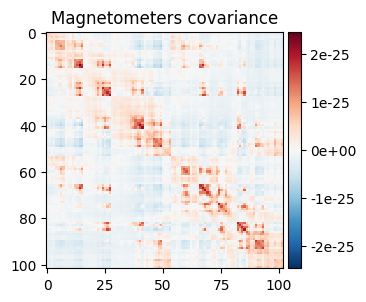

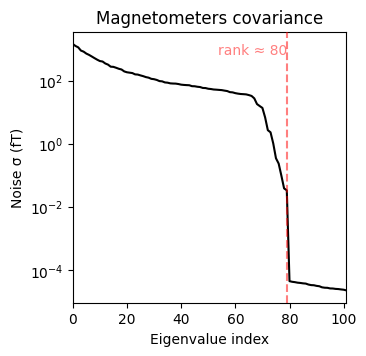

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [100]:
# compute data covariance

data_cov = mne.compute_covariance(epochs, tmin=0.01, tmax=1.5,
                                  method='empirical')
data_cov.plot(epochs.info)


Computing rank from data with rank=None
    Using tolerance 2.4e-09 (2.2e-16 eps * 102 dim * 1.1e+05  max singular value)
    Estimated rank (mag): 102
Found multiple SSS records. Using the first.
    MAG: rank 102 computed from 102 data channels with 0 projectors
Reducing data rank from 102 -> 102
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 31710
[done]
Computing rank from covariance with rank=None
    Using tolerance 8.3e-15 (2.2e-16 eps * 102 dim * 0.37  max singular value)
    Estimated rank (mag): 80
Found multiple SSS records. Using the first.
    MAG: rank 80 computed from 102 data channels with 0 projectors


C:\Users\CCDM\AppData\Local\Temp\ipykernel_8452\1256781823.py:3: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (102 > 80). Consider setting rank to "auto" or setting it explicitly as an integer.
  noise_cov = mne.compute_covariance(epochs, tmin=3., tmax=3.75,


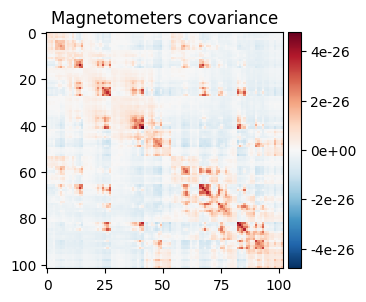

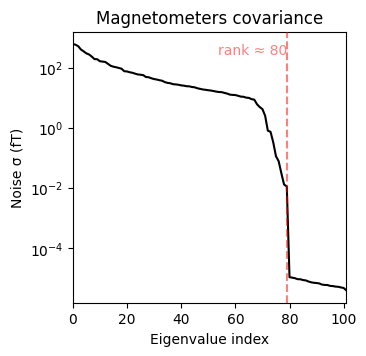

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [11]:
# compute noise covariance from epochs (post-stimulus)

noise_cov = mne.compute_covariance(epochs, tmin=3., tmax=3.75,
                                   method='empirical')
noise_cov.plot(epochs.info)


Computing rank from data with rank=None
    Using tolerance 2.7e-09 (2.2e-16 eps * 102 dim * 1.2e+05  max singular value)
    Estimated rank (mag): 102
Found multiple SSS records. Using the first.
    MAG: rank 102 computed from 102 data channels with 0 projectors
Reducing data rank from 102 -> 102
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 41790
[done]


C:\Users\CCDM\AppData\Local\Temp\ipykernel_7608\649421287.py:3: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (102 > 80). Consider setting rank to "auto" or setting it explicitly as an integer.
  noise_cov = mne.compute_covariance(epochs, tmin=-1., tmax=-0.01,


Computing rank from covariance with rank=None
    Using tolerance 7.8e-15 (2.2e-16 eps * 102 dim * 0.34  max singular value)
    Estimated rank (mag): 80
Found multiple SSS records. Using the first.
    MAG: rank 80 computed from 102 data channels with 0 projectors


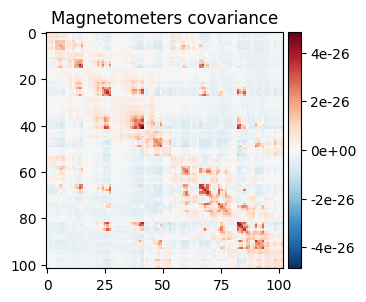

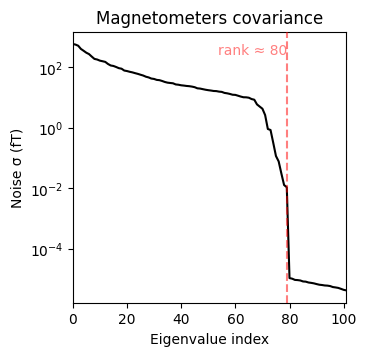

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [10]:
# compute noise covariance from epochs (pre-stimulus)

noise_cov = mne.compute_covariance(epochs, tmin=-1., tmax=-0.01,
                                   method='empirical')
noise_cov.plot(epochs.info)

Opening raw data file D:\Ekaterina_Voevodina\memory_formation\data\empty_room\empty_room_tsss.fif...
Isotrak not found
    Range : 45000 ... 329999 =     45.000 ...   329.999 secs
Ready.
Reading 0 ... 284999  =      0.000 ...   284.999 secs...


C:\Users\CCDM\AppData\Local\Temp\ipykernel_8452\3144208606.py:3: RuntimeWarning: This filename (D:\Ekaterina_Voevodina\memory_formation\data\empty_room\empty_room_tsss.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  empty_room_file =  mne.io.read_raw_fif(empty_room_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 90.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 95.00 Hz)
- Filter length: 1321 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1321 samples (6.605 sec)



[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using up to 1425 segments


[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    0.2s finished


Number of samples used : 57000
[done]
Computing rank from covariance with rank=None
    Using tolerance 1.7e-15 (2.2e-16 eps * 102 dim * 0.075  max singular value)
    Estimated rank (mag): 68
Found multiple SSS records. Using the first.
    MAG: rank 68 computed from 102 data channels with 0 projectors


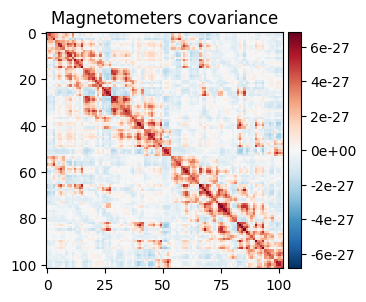

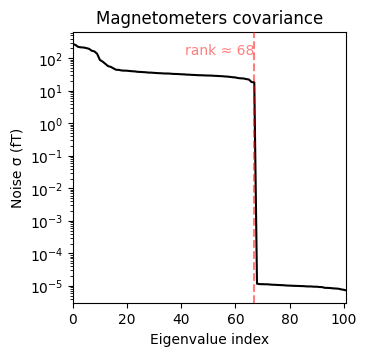

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [101]:
# compute noise covariance from empty room
empty_room_path = 'D:\\Ekaterina_Voevodina\\memory_formation\\data\\empty_room\\empty_room_tsss.fif'
empty_room_file =  mne.io.read_raw_fif(empty_room_path, preload=True)
empty_room_file = empty_room_file.resample(200)


empty_room_filt = empty_room_file.copy()\
    .filter(l_freq=.5, h_freq=90)\
    .notch_filter(50) # filter data

noise_cov = mne.compute_raw_covariance(
    empty_room_filt, tmin=0, tmax=None)
noise_cov.plot(epochs.info)

In [ ]:
noise_cov.plot(epochs.info)

In [62]:
empty_room_filt.pick_types(meg='grad').info

<Info | 18 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0111, MEG0121, MEG0131, MEG0141, MEG0211, MEG0221, MEG0231, ...
 chs: 102 Magnetometers
 custom_ref_applied: False
 description: Vectorview system
 experimenter: meg
 file_id: 4 items (dict)
 highpass: 0.5 Hz
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 90.0 Hz
 meas_date: 2021-04-07 06:29:37 UTC
 meas_id: 4 items (dict)
 nchan: 102
 proc_history: 1 item (list)
 proj_id: 1 item (ndarray)
 proj_name: meditation
 projs: []
 sfreq: 200.0 Hz
 subject_info: 6 items (dict)
>

In [73]:
noise_cov.data

array([[ 1.33374923e-24, -1.09779346e-25, -1.94870621e-26, ...,
         3.71735398e-25,  1.04700076e-26, -3.89064516e-27],
       [-1.09779346e-25,  1.69731323e-24,  7.23500627e-27, ...,
         2.12740897e-25, -2.33080596e-25,  1.99321166e-26],
       [-1.94870621e-26,  7.23500627e-27,  5.48902158e-27, ...,
         2.68835402e-26, -1.09990215e-26, -9.36998393e-28],
       ...,
       [ 3.71735398e-25,  2.12740897e-25,  2.68835402e-26, ...,
         4.89687997e-24,  3.00756886e-25,  3.60960129e-26],
       [ 1.04700076e-26, -2.33080596e-25, -1.09990215e-26, ...,
         3.00756886e-25,  3.18965248e-24, -3.89872412e-27],
       [-3.89064516e-27,  1.99321166e-26, -9.36998393e-28, ...,
         3.60960129e-26, -3.89872412e-27,  4.83545900e-27]])

In [76]:
import numpy as np

In [85]:

#noise_cov_reg = mne.cov.regularize(noise_cov, empty_room_filt.info, mag=1e6, grad=1e6)
#noise_cov_reg.plot(empty_room_filt.info)

noise_numpy_cov = noise_cov.data
noise_cov2 = noise_cov.copy()
u,s,v = np.linalg.svd(noise_cov_numpy)
print(s.shape)
regMatrix = np.eye(s.shape[0])*1e0
noise_numpy_cov += regMatrix
noise_cov2  = mne.Covariance(noise_numpy_cov, epochs.info['ch_names'],epochs.info['bads'],epochs.info['projs'], 0)



(306,)


In [103]:
filters = mne.beamformer.make_lcmv(epochs.info, fwd, data_cov, reg=0.05,
                    noise_cov=noise_cov, pick_ori='max-power',
                    weight_norm='unit-noise-gain', rank='info')


Computing rank from covariance with rank='info'
    MAG: rank 102 after 0 projectors applied to 102 channels
Computing rank from covariance with rank='info'
    MAG: rank 102 after 0 projectors applied to 102 channels
Making LCMV beamformer with rank {'mag': 102}
Computing inverse operator with 102 channels.
    102 out of 102 channels remain after picking
Selected 102 channels
Whitening the forward solution.
Computing rank from covariance with rank={'mag': 102}
    Setting small MAG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing beamformer filters for 8192 sources
Filter computation complete


In [12]:
#? INVESTIGATING THE BEAMFORMER
#! DIRTY CODE
# compute spatial LCMV filter on EPOCHS
filters = mne.beamformer.make_lcmv(info, fwd, data_cov, reg=0.05,
                    noise_cov=noise_cov, pick_ori='max-power',
                    weight_norm='unit-noise-gain', rank=None)

# apply spatial LCMV filter to EPOCHS
stc = mne.beamformer.apply_lcmv_epochs(epochs_theta, filters)

Computing rank from covariance with rank=None
    Using tolerance 9.2e-15 (2.2e-16 eps * 102 dim * 0.41  max singular value)
    Estimated rank (mag): 80
    MAG: rank 80 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 8.3e-15 (2.2e-16 eps * 102 dim * 0.37  max singular value)
    Estimated rank (mag): 80
    MAG: rank 80 computed from 102 data channels with 0 projectors
Making LCMV beamformer with rank {'mag': 80}
Computing inverse operator with 102 channels.
    102 out of 102 channels remain after picking
Selected 102 channels
Whitening the forward solution.
Computing rank from covariance with rank={'mag': 80}
    Setting small MAG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing beamformer filters for 8192 sources
Filter computation complete


In [42]:
# compute spatial LCMV filter on EVOKED data

# part of the epoch is used for noise covariance
filters = mne.beamformer.make_lcmv(evoked_theta.info, fwd, data_cov, reg=0.05,
                    noise_cov=noise_cov, pick_ori='max-power',
                    weight_norm='unit-noise-gain', rank=None)

Computing rank from covariance with rank=None
    Using tolerance 9.2e-15 (2.2e-16 eps * 102 dim * 0.41  max singular value)
    Estimated rank (mag): 80
    MAG: rank 80 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 8.3e-15 (2.2e-16 eps * 102 dim * 0.37  max singular value)
    Estimated rank (mag): 80
    MAG: rank 80 computed from 102 data channels with 0 projectors
Making LCMV beamformer with rank {'mag': 80}
Computing inverse operator with 102 channels.
    102 out of 102 channels remain after picking
Selected 102 channels
Whitening the forward solution.
Computing rank from covariance with rank={'mag': 80}
    Setting small MAG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing beamformer filters for 8192 sources
Filter computation complete


In [94]:
# compute spatial LCMV filter

# part of the epoch is used for noise covariance
# filters = mne.beamformer.make_lcmv(evoked_theta.info, fwd, data_cov, reg=0.05,
#                     noise_cov=noise_cov, pick_ori='max-power',
#                     weight_norm='unit-noise-gain', rank=None)

# in case empty room is used for noise covariance
filters = mne.beamformer.make_lcmv(epochs.info, fwd, data_cov, reg=0.05,
                    noise_cov=noise_cov, pick_ori='max-power',
                    weight_norm='unit-noise-gain', rank='info', reduce_rank=True)

# reg=0.05 loading the diagonal of the covariance matrix with 5% of the sensor power

Computing rank from covariance with rank='info'
    MAG: rank 102 after 0 projectors applied to 102 channels
Computing rank from covariance with rank='info'
    MAG: rank 102 after 0 projectors applied to 102 channels
Making LCMV beamformer with rank {'mag': 102}
Computing inverse operator with 102 channels.
    102 out of 102 channels remain after picking
Selected 102 channels
Whitening the forward solution.
Computing rank from covariance with rank={'mag': 102}
    Setting small MAG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing beamformer filters for 8192 sources
Filter computation complete


In [53]:
epochs_theta_envelope = epochs_theta.apply_hilbert(envelope=True).average()

In [13]:
stc_hilbert_evoked = mne.beamformer.apply_lcmv(epochs_theta.apply_hilbert(envelope=True).average(), filters)


In [55]:
stc_hilbert_evoked.plot()

Using control points [328.6929892  357.16506264 532.57127669]


In [15]:
type(stc)

list

In [29]:
df = stc[0].to_data_frame().drop(['subject', 'time'], axis=1)

In [31]:
df.mean()

LH_19        -30.573095
LH_225        -0.204073
LH_336       119.843223
LH_350      -136.885012
LH_423      -117.812295
                ...    
RH_151202    194.947996
RH_151232   -168.333281
RH_151265   -151.694446
RH_151276   -212.623820
RH_151355    112.701115
Length: 8192, dtype: float64

In [33]:
df.iloc[[0]].shape

(1, 8192)

In [39]:
df.mean().shape

(8192,)

In [45]:
df.iloc[0:21, :]

,LH_19,LH_225,LH_336,LH_350,LH_423,LH_510,LH_518,LH_542,LH_570,LH_578,...,RH_151007,RH_151057,RH_151113,RH_151157,RH_151196,RH_151202,RH_151232,RH_151265,RH_151276,RH_151355
0,-195.561923,-361.962309,-691.116709,673.834566,-457.593337,-345.667738,-547.565142,60.056038,523.102593,-119.538079,...,-369.608528,197.952052,477.072761,527.024971,-588.331155,-556.617999,543.264092,556.238492,327.954707,-539.222738
1,87.499494,-382.796178,-474.483554,482.961294,-109.881314,-365.158505,-403.185023,315.012869,490.644562,202.364308,...,-346.500209,-47.472710,484.620153,195.387503,-490.314297,-468.482183,421.840460,423.409978,338.339263,-298.094425
2,127.693710,-436.154462,-560.857194,581.733569,-48.793345,-417.940266,-451.716272,433.768011,591.072228,315.299172,...,-409.106818,-88.941642,628.677903,206.382005,-617.082643,-599.972384,544.650677,543.455357,452.944518,-372.499119
3,215.162650,-505.835923,-584.842151,616.477530,37.016856,-490.696303,-487.917401,573.609789,675.450555,440.506464,...,-462.217266,-186.003088,738.024985,164.144263,-683.733617,-665.184835,600.227953,598.343492,521.703682,-370.319628
4,265.436842,-570.519638,-670.863899,716.238483,106.547082,-557.725690,-545.533357,712.278166,788.320718,564.721401,...,-532.180214,-250.071003,899.588758,175.789219,-816.314906,-800.082207,728.177005,725.029912,638.685136,-442.868645
5,303.349744,-619.037300,-727.453075,781.424368,154.070098,-609.011015,-588.237423,812.024256,868.252263,647.879803,...,-579.861506,-300.116484,1008.000989,179.905792,-901.990013,-887.773750,811.572985,807.580436,718.198649,-486.727443
6,350.520051,-682.212492,-815.570356,883.786695,225.145978,-676.053909,-647.347761,953.818412,983.269851,771.684758,...,-649.674641,-367.591362,1175.725788,196.462433,-1038.099122,-1026.463964,945.216984,940.360554,838.396692,-564.443694
7,364.685934,-715.685167,-885.992923,962.394209,260.306893,-711.950328,-687.812123,1035.123995,1057.927309,838.346323,...,-691.973398,-393.813000,1283.324529,219.481944,-1133.020246,-1126.421403,1043.279227,1036.921286,926.095227,-631.093079
8,401.327681,-768.844982,-972.900645,1063.035198,327.139161,-769.633188,-742.036664,1166.443505,1165.152796,951.388642,...,-755.011673,-453.255119,1444.180940,241.213363,-1265.095602,-1262.496485,1176.365017,1169.021509,1044.487032,-712.941205
9,403.018142,-793.873726,-1051.422253,1149.876497,357.656326,-797.027691,-781.014006,1239.655573,1237.723580,1011.149769,...,-794.747208,-467.620424,1553.733568,274.479734,-1366.845517,-1371.112676,1284.465478,1275.213987,1138.478336,-793.249665


In [17]:
import seaborn as sns

<AxesSubplot:>

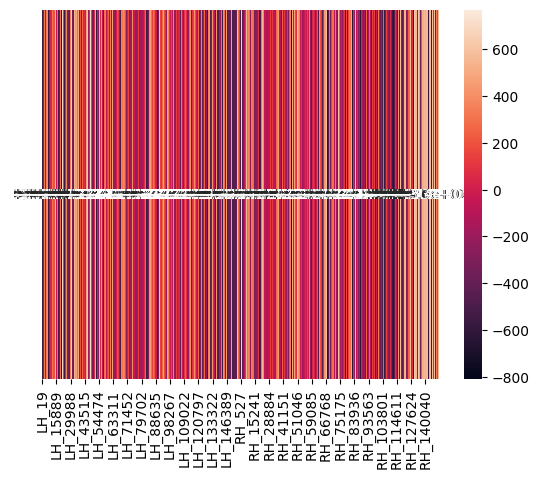

In [48]:
sns.heatmap(df.iloc[[0]], annot=True)

In [51]:
len(stc)

210

In [48]:
stc[0]

<SourceEstimate | 8192 vertices, subject : sub2, tmin : -1500.0 (ms), tmax : 3995.0 (ms), tstep : 5.0 (ms), data shape : (8192, 1100), ~68.8 MB>

In [78]:
filters

<Beamformer | LCMV, subject "sub2", 8192 vert, 102 ch, max-power ori, unit-noise-gain norm, matrix inversion, rank 80>

In [43]:
# apply spatial LCMV filter to evoked data
stc = mne.beamformer.apply_lcmv(evoked_theta, filters)

In [14]:
#! find a way to take the envelope of the signal
#! check matrices of different filters for averaged signal or for one epoch
#!!!!!!!!!!
stc_hits = mne.beamformer.apply_lcmv(epochs['hits'].filter(4., 8.).average(), filters) # dipoles x time for condition 1
stc_miss = mne.beamformer.apply_lcmv(epochs['miss'].filter(4., 8.).average(), filters) # dipoles x time for condition 2
stc_diff = stc_hits - stc_miss

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 331 samples (1.655 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 331 samples (1.655 sec)



[Parallel(n_jobs=1)]: Done 13260 out of 13260 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 8160 out of 8160 | elapsed:    1.4s finished


In [44]:
#! Chnge the limits for the figure!!!
#!!!!!!!!!!!!!!!
lims = [0.3, 0.45, 0.6]
kwargs = dict(src=src, subject=subject, subjects_dir=mris_dir,
              initial_time=None, verbose=True)

In [ ]:
import numpy as np

stc_data = np.array([
    stc_.data
    for stc_ in stc
])

In [71]:
stc_data.shape

(210, 8192, 1100)

In [45]:
filedir = os.path.join(subject_dir, 'movie', 'theta')
check_paths(filedir)

In [17]:
# visualize the sources and save the movie
# launch only for GROUP analysis

filepath = os.path.join(filedir, 'sources_all_post.mp4')

%matplotlib inline
fig = stc.plot(hemi='both', views=['dorsal', 'ventral'], clim=dict(kind='value', pos_lims=lims), **kwargs)
fig.save_movie(filename=filepath, time_dilation=4.0, tmin=-1.0, tmax=2.0)


Using pyvistaqt 3d backend.



In [46]:
filepath = os.path.join(filedir, 'sources_all_post.mp4')
fig = stc.plot(hemi='both', views=['dorsal', 'ventral'], clim=dict(kind='value', pos_lims=lims), **kwargs)

**STOPPED HERE**

In [27]:
import numpy as np
np.min(stc_diff.data[1,:])
lims

[0.3, 0.45, 0.6]

In [18]:
# Create a SourceMorph from one subject to another
stc_fs = mne.compute_source_morph(src, subject_from='sub2', subject_to='fsaverage', subjects_dir=mris_dir).apply(stc)
stc_fs.plot()

ValueError: vertices do not match between morph (4098) and stc (4094) for left hemisphere:
[    19    225    336 ... 158318 158352 158370]
[    19    225    336 ... 158318 158352 158370]
Perhaps src_to=fwd["src"] needs to be passed when calling compute_source_morph. Vertices were likely excluded during forward computation.